# Reconocimiento de las señales de tráfico

In [5]:
import tensorflow as tf
import os
import skimage.io as imd
import numpy as np

In [6]:
def load_ml_data(data_directory):
    dirs = [d for d in os.listdir(data_directory)
            if os.path.isdir(os.path.join(data_directory,d))]
    
    labels = []
    images = []
    for d in dirs:
        label_dir = os.path.join(data_directory, d)
        file_names = [os.path.join(label_dir, f)
                     for f in os.listdir(label_dir)
                     if f.endswith(".ppm")]
        
        for f in file_names:
            images.append(imd.imread(f))
            labels.append(int(d))
        
    return images, labels

In [7]:
main_dir = "../datasets/belgian/"
train_data_dir = os.path.join(main_dir, "Training")
test_data_dir = os.path.join(main_dir, "Testing")

In [9]:
images, labels = load_ml_data(train_data_dir)

In [10]:
images = np.array(images)

/var/folders/w_/vx2p5fzn4sxd7m_47lpd9q7m0000gn/T/ipykernel_31939/2580951120.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images = np.array(images)


In [11]:
labels = np.array(labels)

In [12]:
images.ndim

1

In [13]:
images.size

4575

In [14]:
images[0]

array([[[ 47,  52,  59],
        [ 35,  64,  72],
        [ 53, 104, 112],
        ...,
        [ 75,  82,  60],
        [ 72,  77,  55],
        [ 68,  71,  50]],

       [[ 46,  51,  57],
        [ 38,  66,  74],
        [ 58, 109, 115],
        ...,
        [ 74,  84,  62],
        [ 76,  84,  62],
        [ 76,  83,  61]],

       [[ 44,  50,  56],
        [ 44,  71,  79],
        [ 59, 109, 115],
        ...,
        [ 71,  83,  61],
        [ 74,  84,  63],
        [ 75,  84,  63]],

       ...,

       [[120, 141, 139],
        [119, 144, 138],
        [114, 141, 131],
        ...,
        [ 33,  30,  27],
        [ 32,  30,  28],
        [ 30,  30,  28]],

       [[133, 151, 145],
        [124, 146, 138],
        [111, 137, 127],
        ...,
        [ 31,  30,  25],
        [ 32,  32,  27],
        [ 33,  33,  30]],

       [[139, 158, 147],
        [124, 146, 137],
        [107, 132, 123],
        ...,
        [ 31,  30,  23],
        [ 33,  33,  27],
        [ 35,  36,  31]]

In [15]:
labels.ndim

1

In [16]:
labels.size

4575

In [17]:
len(set(labels))

62

In [18]:
images.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

In [19]:
images.itemsize

8

In [20]:
images.nbytes

36600

In [21]:
images.nbytes/images.itemsize

4575.0

In [22]:
import matplotlib.pyplot as plt

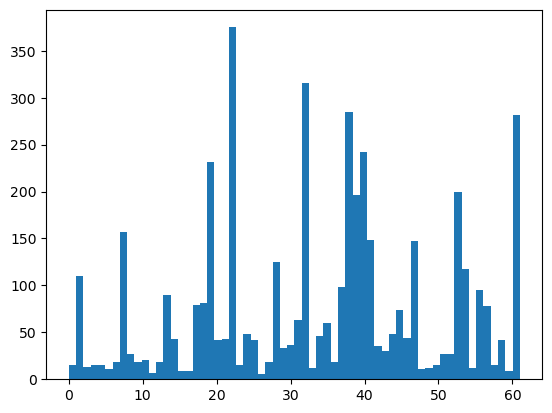

In [23]:
plt.hist(labels, len(set(labels)))
plt.show()

In [24]:
import random

In [25]:
rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs

[645, 1692, 307, 3451, 4320, 4016]

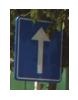

Forma:(212, 153, 3), min:5, max:255


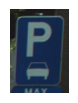

Forma:(154, 107, 3), min:4, max:234


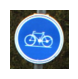

Forma:(146, 144, 3), min:0, max:255


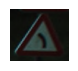

Forma:(73, 82, 3), min:0, max:151


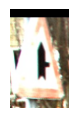

Forma:(190, 112, 3), min:0, max:255


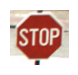

Forma:(86, 91, 3), min:3, max:255


In [26]:
for i in range(len(rand_signs)):
    temp_im = images[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im)
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print("Forma:{0}, min:{1}, max:{2}".format(temp_im.shape,
                                               temp_im.min(),
                                               temp_im.max()))

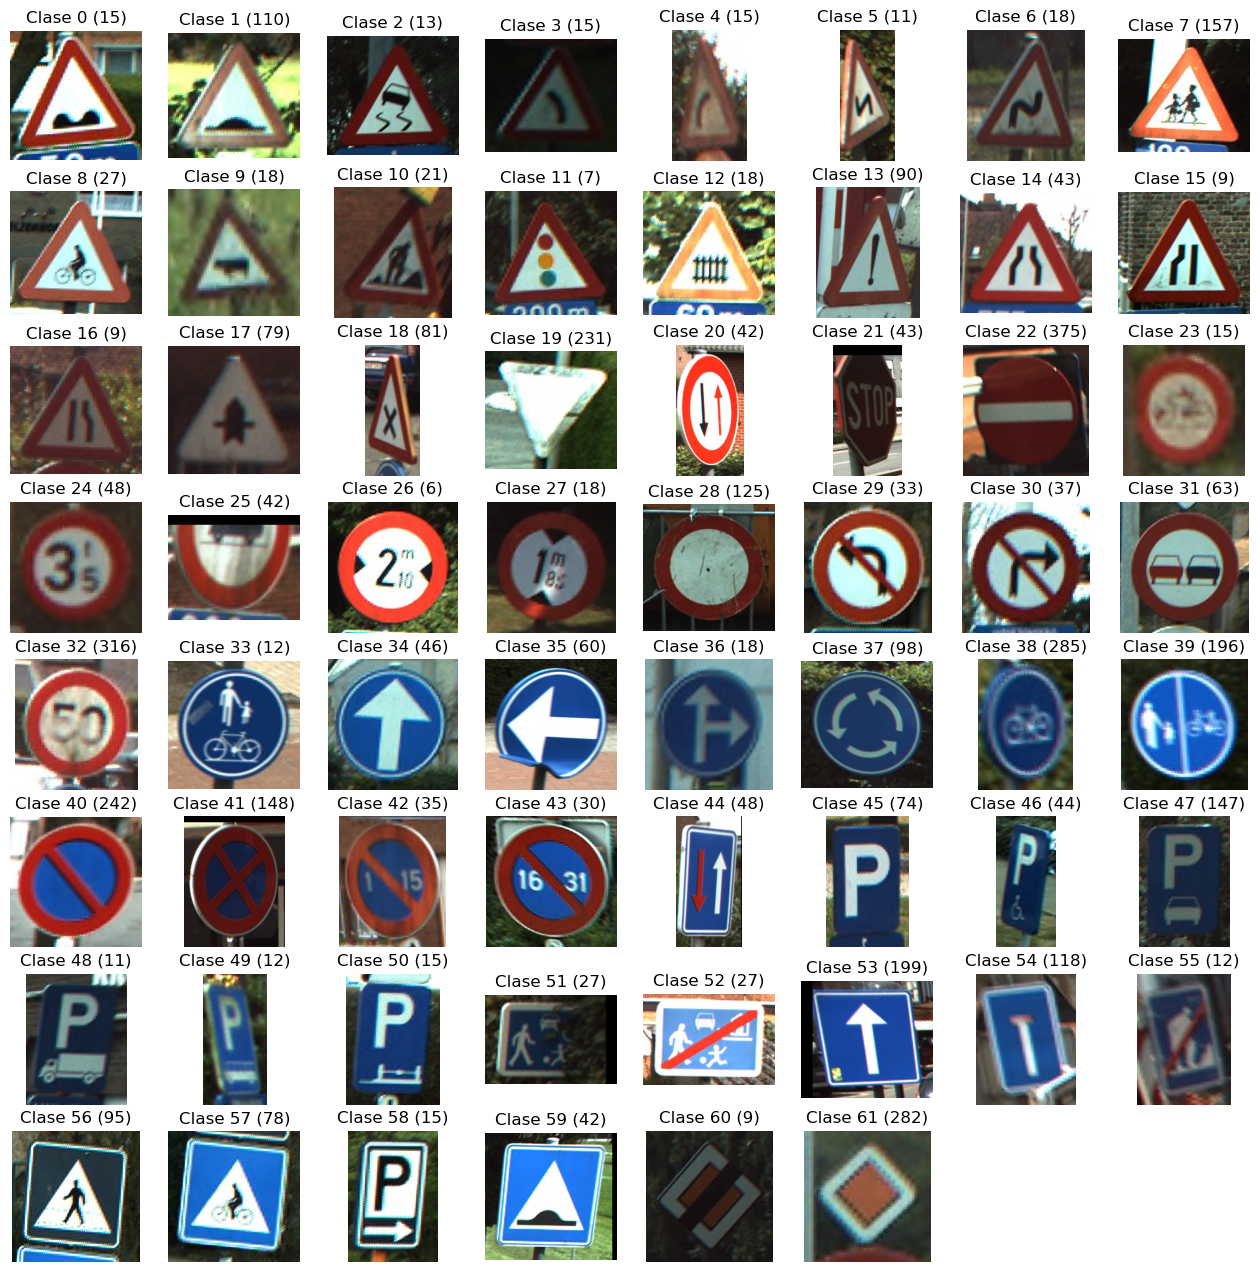

In [27]:
unique_labels = set(labels)
plt.figure(figsize=(16,16))
i = 1
for label in unique_labels:
    temp_im = images[list(labels).index(label)]
    plt.subplot(8,8, i)
    plt.axis("off")
    plt.title("Clase {0} ({1})".format(label, list(labels).count(label)))
    i +=1
    plt.imshow(temp_im)
plt.show()

In [28]:
type(labels)

numpy.ndarray

# Modelo de Red Neuronal con TensorFlow
* Las imágenes no todas son del mismo tamaño
* Hay 62 clases de imágenes (desde la 0 hasta la 61)
* La distribución de señales de tráfico no es uniforme (algunas salen más veces que otras)

In [29]:
from skimage import transform

In [30]:
w = 9999 
h = 9999
for image in images:
    if image.shape[0] < h:
        h = image.shape[0]
    if image.shape[1] < w:
        w = image.shape[1]
print("Tamaño mínimo: {0}x{1}".format(h,w))

Tamaño mínimo: 22x20


In [31]:
images30 = [transform.resize(image, (30,30)) for image in images]

In [32]:
images30[0]

array([[[0.27510658, 0.41415867, 0.43608182],
        [0.43338955, 0.55899977, 0.55648532],
        [0.43781416, 0.54571402, 0.52843905],
        ...,
        [0.2652865 , 0.28814627, 0.22226243],
        [0.24780191, 0.27859383, 0.20123823],
        [0.26975804, 0.30977537, 0.22552298]],

       [[0.28302856, 0.42122046, 0.43644986],
        [0.43065684, 0.55706019, 0.54938682],
        [0.43465944, 0.52807211, 0.49799933],
        ...,
        [0.3102763 , 0.32177129, 0.25409862],
        [0.28447408, 0.30652794, 0.23201788],
        [0.26778125, 0.29771846, 0.2248069 ]],

       [[0.29251019, 0.44739338, 0.46443151],
        [0.44861811, 0.57639596, 0.55946291],
        [0.4437236 , 0.5302106 , 0.50575425],
        ...,
        [0.36526534, 0.33368305, 0.27429249],
        [0.34852791, 0.31345544, 0.26293969],
        [0.33355526, 0.30820335, 0.26529291]],

       ...,

       [[0.38560093, 0.52162137, 0.50706376],
        [0.42146002, 0.54561036, 0.51703493],
        [0.42520636, 0

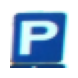

Forma:(30, 30, 3), min:0.029564681577906995, max:0.9999990359030106


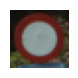

Forma:(30, 30, 3), min:0.0442442908587909, max:0.6503036816505139


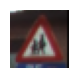

Forma:(30, 30, 3), min:0.017218264849004176, max:0.9977637348613344


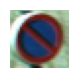

Forma:(30, 30, 3), min:0.038458165054860785, max:0.9999956926292666


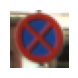

Forma:(30, 30, 3), min:0.061847686355849855, max:0.9999153135039456


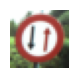

Forma:(30, 30, 3), min:0.09204255936475492, max:0.9999999999999999


In [33]:
rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs
for i in range(len(rand_signs)):
    temp_im = images30[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im)
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print("Forma:{0}, min:{1}, max:{2}".format(temp_im.shape,
                                               temp_im.min(),
                                               temp_im.max()))

In [34]:
from skimage.color import rgb2gray

In [35]:
images30 = np.array(images30)
images30 = rgb2gray(images30)

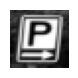

Forma:(30, 30), min:0.08161607037091646, max:0.9999232184103299


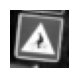

Forma:(30, 30), min:0.06300775411479755, max:0.9974469203302001


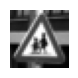

Forma:(30, 30), min:0.09004719813216017, max:0.9990461229003811


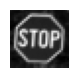

Forma:(30, 30), min:0.05381641454668277, max:0.6966227829817512


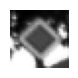

Forma:(30, 30), min:0.0763268998201753, max:0.9999999979780437


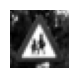

Forma:(30, 30), min:0.1441573319242141, max:0.9986563644123794


In [36]:
rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs
for i in range(len(rand_signs)):
    temp_im = images30[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im, cmap="gray")
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print("Forma:{0}, min:{1}, max:{2}".format(temp_im.shape,
                                               temp_im.min(),
                                               temp_im.max()))

In [40]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [46]:
x = tf.placeholder(dtype = tf.float32, shape = [None, 30,30])
y = tf.placeholder(dtype = tf.int32, shape = [None])

images_flat = tf.keras.layers.Flatten()(x)
logits = tf.layers.dense(images_flat, 62, tf.nn.relu)

loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits=logits))

train_opt = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

final_pred = tf.argmax(logits,1)

accuracy = tf.reduce_mean(tf.cast(final_pred, tf.float32))

/var/folders/w_/vx2p5fzn4sxd7m_47lpd9q7m0000gn/T/ipykernel_31939/2406959677.py:5: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  logits = tf.layers.dense(images_flat, 62, tf.nn.relu)


In [47]:
images_flat

<tf.Tensor 'flatten_4/Reshape:0' shape=(?, 900) dtype=float32>

In [48]:
logits

<tf.Tensor 'dense/Relu:0' shape=(?, 62) dtype=float32>

In [49]:
loss

<tf.Tensor 'Mean:0' shape=() dtype=float32>

In [50]:
final_pred

<tf.Tensor 'ArgMax:0' shape=(?,) dtype=int64>

In [51]:
tf.set_random_seed(1234)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(601):
    
    _, accuracy_val = sess.run([train_opt, accuracy],
                              feed_dict= {
                                  x: images30,
                                  y: list(labels)
                              })
    #_, loss_val = sess.run([train_opt, loss],
    #                          feed_dict= {
    #                              x: images30,
    #                              y: list(labels)
    #                          })
    if i%50 == 0:
        print("EPOCH", i)
        print("Eficacia: ", accuracy_val)
        #print("Pérdidas:", loss_val)
    #print("Fin del Ecpoh ", i)

2023-08-31 10:15:33.632209: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled
2023-08-31 10:15:33.633933: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


EPOCH 0
Eficacia:  46.227104
EPOCH 50
Eficacia:  35.151474
EPOCH 100
Eficacia:  35.300983
EPOCH 150
Eficacia:  35.125465
EPOCH 200
Eficacia:  35.12743
EPOCH 250
Eficacia:  35.11191
EPOCH 300
Eficacia:  35.141857
EPOCH 350
Eficacia:  35.199345
EPOCH 400
Eficacia:  35.204807
EPOCH 450
Eficacia:  35.21508
EPOCH 500
Eficacia:  35.176613
EPOCH 550
Eficacia:  35.128742
EPOCH 600
Eficacia:  35.107323


# Evaluación de la red neuronal

In [52]:
sample_idx = random.sample(range(len(images30)), 40)
sample_images = [images30[i] for i in sample_idx]
sample_labels = [labels[i] for i in sample_idx]

In [53]:
prediction = sess.run([final_pred], feed_dict={x:sample_images})[0]

In [54]:
prediction

array([32, 32, 22, 38, 28, 28, 40, 61, 18, 40, 32, 22, 22, 61, 22, 39, 37,
        7, 38, 22, 21, 57, 32, 38, 39, 53, 28, 39, 61, 40, 39, 19, 32, 40,
       19, 40, 39, 22,  7, 24])

In [55]:
sample_labels

[45,
 32,
 45,
 38,
 8,
 27,
 40,
 61,
 1,
 40,
 32,
 22,
 22,
 61,
 22,
 39,
 37,
 7,
 38,
 22,
 21,
 13,
 8,
 38,
 39,
 53,
 10,
 39,
 61,
 41,
 39,
 19,
 31,
 40,
 1,
 38,
 39,
 22,
 8,
 24]

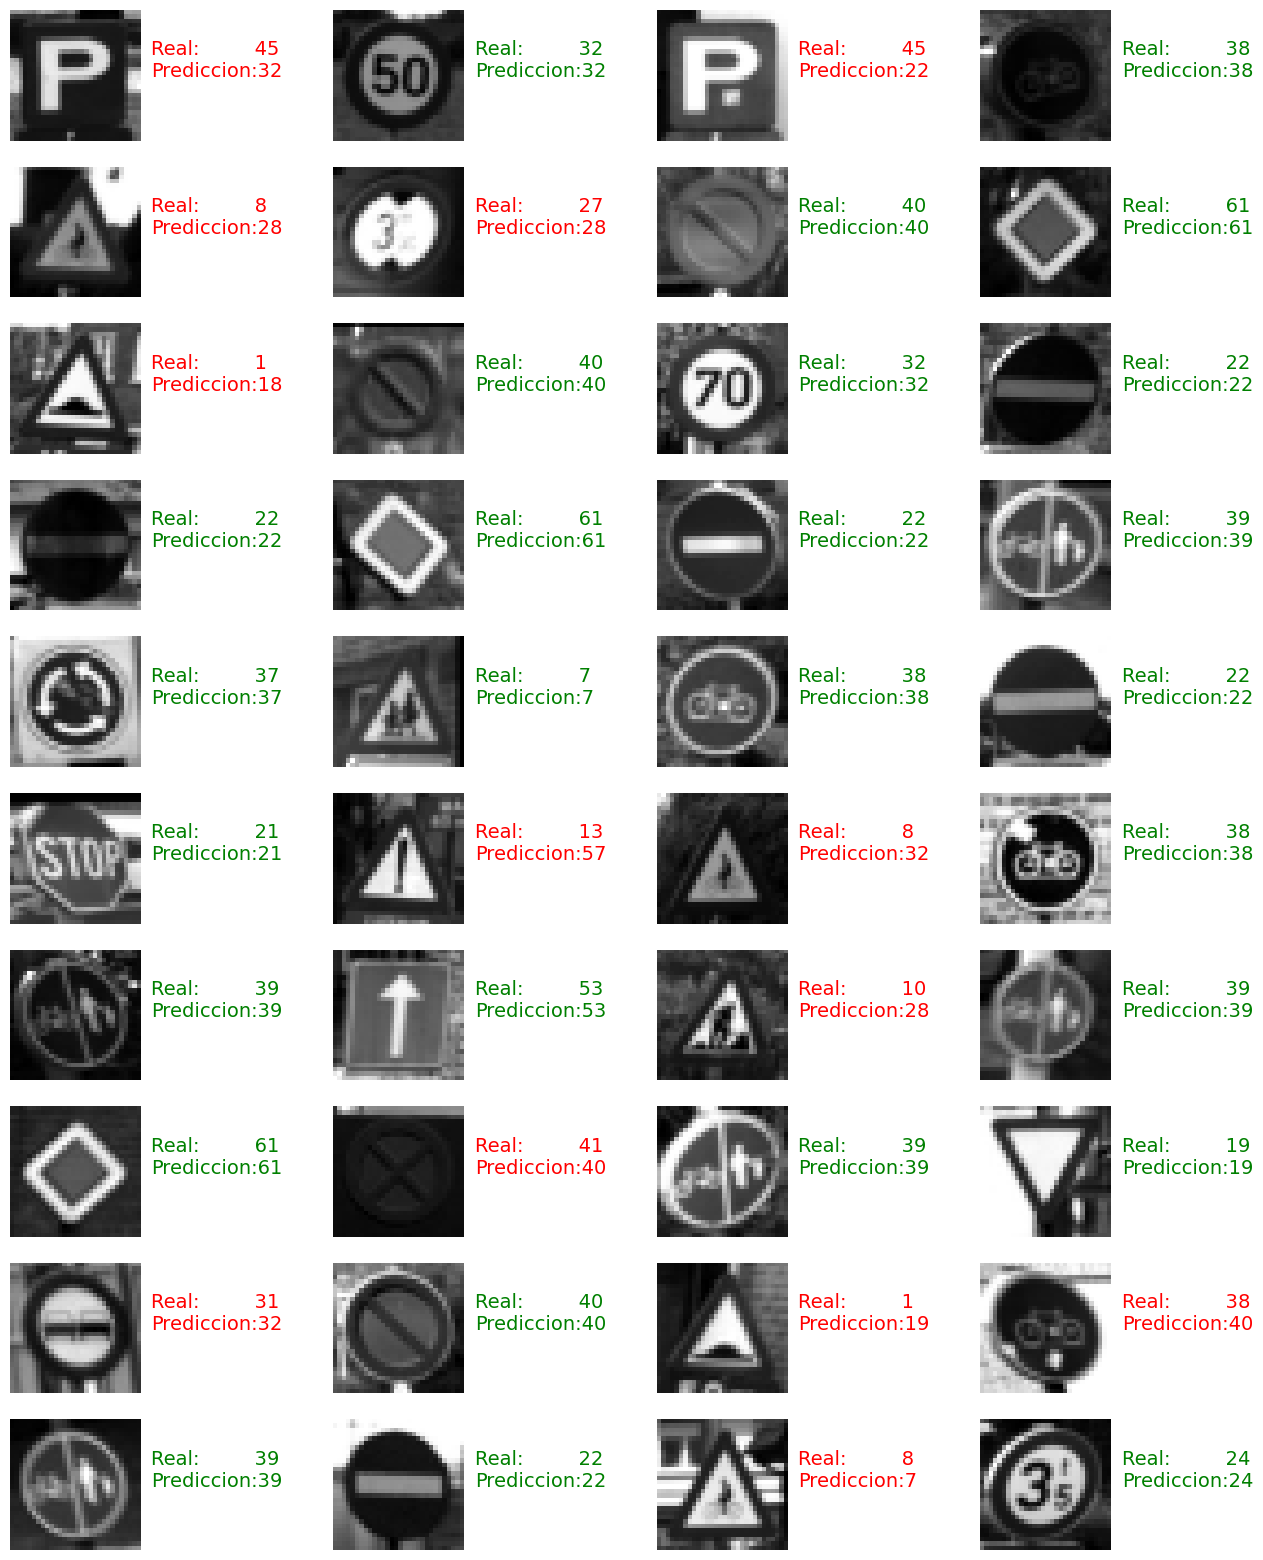

In [56]:
plt.figure(figsize=(16,20))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    predi = prediction[i]
    plt.subplot(10,4,i+1)
    plt.axis("off")
    color = "green" if truth==predi else "red"
    plt.text(32,15, "Real:         {0}\nPrediccion:{1}".format(truth, predi),
            fontsize = 14, color = color)
    plt.imshow(sample_images[i], cmap="gray")
plt.show()

In [57]:
test_images, test_labels = load_ml_data(test_data_dir)

In [58]:
test_images30 = [transform.resize(im,(30,30)) for im in test_images]

In [59]:
test_images30 = rgb2gray(np.array(test_images30))

In [60]:
prediction = sess.run([final_pred], feed_dict={x:test_images30})[0]

In [61]:
match_count = sum([int(l0 == lp) for l0, lp in zip(test_labels, prediction)])
match_count

1767

In [62]:
acc = match_count/len(test_labels)*100
print("Eficacia de la red neuronal: {:.2f}".format(acc))

Eficacia de la red neuronal: 70.12
